# ***Recession Predictive model***

# 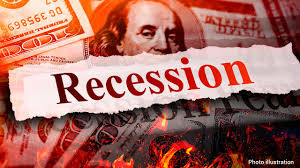

### Data Cleaning & visulization

In [ ]:
# Importing the required libraries.
import pandas as pd

In [ ]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session

In [ ]:
df1 = pd.read_csv("Consumer_price_index.csv")
df1.head()

In [ ]:
df1.rename(columns = {'CPALTT01USQ657N':'CPI'}, inplace = True)
df1['DATE'] = df1['DATE'].astype('datetime64[ns]')
df1.head()

In [ ]:
df2 = pd.read_csv("Retail Sales.csv")
df2.head()

In [ ]:
df2.rename(columns = {'value':'Retail Sales'}, inplace = True)
df2['DATE'] = df2['DATE'].astype('datetime64[ns]')
df2 = df2.drop("Unnamed: 0", axis=1)
df2.head()

In [ ]:
df3 = pd.read_csv("Consumer Loans.csv")
df3.head()

In [ ]:
df3.rename(columns = {'CLSACBQ158SBOG':'Consumer Debt'}, inplace = True)
df3['DATE'] = df3['DATE'].astype('datetime64[ns]')
df3.head()

In [ ]:
df4 = pd.read_csv("wage_1.csv")
df4.head()

In [ ]:
df4['DATE'] = df4['DATE'].astype('datetime64[ns]')
df4.head()

In [ ]:
df5 = pd.read_csv("GDP.csv")
df5['DATE'] = df5['DATE'].astype('datetime64[ns]')
df5.head()

In [ ]:
df6 = pd.read_csv("Employment.csv")
df6['DATE'] = df6['Label'].astype('datetime64[ns]')
df6.head()

In [ ]:
df6.drop(['Year', 'Period', 'Label'], axis = 1, inplace = True)
df6.rename(columns = {'Value':'Employment Rate'}, inplace = True)

In [ ]:
df7 = pd.read_csv("Industrial Production.csv")
df7.rename(columns = {'IPB50001SQ':'Industrial Production'}, inplace = True)
df7['DATE'] = df7['DATE'].astype('datetime64[ns]')
df7.head()

In [ ]:
df8 = pd.read_csv("House Price Index.csv")
df8.rename(columns = {'USSTHPI':'House market'}, inplace = True)
df8['DATE'] = df8['DATE'].astype('datetime64[ns]')
df8.head()

In [ ]:
df9 = pd.read_excel("trade balance.xls")
df9['DATE'] = df9['DATE'].astype('datetime64[ns]')
df9.head()

In [ ]:
df10 = pd.read_csv("stock prices.csv")
df10.rename(columns = {'SPASTT01USQ661N':'Stock market'}, inplace = True)
df10['DATE'] = df10['DATE'].astype('datetime64[ns]')
df10.head()

In [ ]:
df11 = pd.read_csv("Interest Rates.csv")
df11.rename(columns = {'BOGZ1FL072052006Q':'Interest Rates'}, inplace = True)
df11['DATE'] = df11['DATE'].astype('datetime64[ns]')
df11.head()

In [ ]:
df12 = pd.read_csv("Money supply.csv")
df12.rename(columns = {'MANMM101USQ189S':'Money supply'}, inplace = True)
df12['DATE'] = df12['DATE'].astype('datetime64[ns]')
df12.head()

In [ ]:
df13 = pd.read_excel("Target.xlsx")
df13['DATE'] = df13['DATE'].astype('datetime64[ns]')
df13.head()

In [ ]:
df = pd.merge(df1, df2, on = 'DATE', how = 'left')
df = pd.merge(df, df3, on = 'DATE', how = 'left')
df = pd.merge(df, df4, on = 'DATE', how = 'left')
df = pd.merge(df, df5, on = 'DATE', how = 'left')
df = pd.merge(df, df6, on = 'DATE', how = 'left')
df = pd.merge(df, df7, on = 'DATE', how = 'left')
df = pd.merge(df, df8, on = 'DATE', how = 'left')
df = pd.merge(df, df9, on = 'DATE', how = 'left')
df = pd.merge(df, df10, on = 'DATE', how = 'left')
df = pd.merge(df, df11, on = 'DATE', how = 'left')
df = pd.merge(df, df12, on = 'DATE', how = 'left')
df = pd.merge(df, df13, on = 'DATE', how = 'left')
df

In [ ]:
import pandas as pd
import numpy as np
# Identify columns with missing values
missing_cols = df.columns[df.isnull().any()]

# For each column with missing values, compute top non-zero values
for col in missing_cols:
    non_zero_values = df[col][df[col] != 0].value_counts().index.tolist()

    # Impute missing values with top non-zero values
    df[col] = df[col].fillna(pd.Series(np.random.choice(non_zero_values, size=len(df[col][df[col].isnull()]))))

In [ ]:
df

In [ ]:
df.dtypes

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset into a Pandas dataframe

# Separate the target variable from the predictors
target = df['Target']
predictors = df.drop(['Retail Sales', 'Series ID', 'DATE', 'Target'], axis=1)

# Standardize the predictors to have mean=0 and variance=1
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

# Perform PCA to reduce the dimensionality of the predictors
pca = PCA()
pca.fit(predictors_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed to explain 95% of the variance: {num_components}")

# Project the data onto the top k principal components
pca = PCA(n_components=num_components)
predictors_pca = pca.fit_transform(predictors_scaled)

In [ ]:
import pandas as pd

# Calculate the correlation between each feature and the target variable
corr_matrix = df.corr()
corr_with_target = corr_matrix['Target']

# Print the correlation values in descending order
print(corr_with_target.sort_values(ascending=False))

In [ ]:
print(df.isnull().sum())

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = df[['CPI','Retail Sales','Consumer Debt','Wage Growth','GDP','Employment Rate','Industrial Production',
           'House market','Trade balance ','Stock market','Interest Rates', 'Money supply']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

In [ ]:
#after
# Select numerical columns
df1 = df.select_dtypes(include=['float', 'int'])

# Min-Max scaling to bring the range between -1 and 1
df1 = 2 * (df1 - df1.min()) / (df1.max() - df1.min()) - 1

# Consider only the following variables in your analysis:
# 'GDP','Income composition of resources','Schooling',and 'Total expenditure'.
df2 = df1[['CPI','Consumer Debt','Wage Growth','GDP','Employment Rate','Industrial Production',
           'House market','Trade balance ','Stock market','Interest Rates', 'Money supply']]
df2.head()

In [ ]:
#after
df2.describe(include = 'all')

In [ ]:
#after
# Calculate the correlation matrix
corr_matrix = df2.corr()

# Display the correlation matrix
#print(corr_matrix)

In [ ]:
# Select the target variable from your target dataframe
target_var = df['Target']

# Calculate the correlation between the target variable and the variables in df2
corr_with_target = df2.corrwith(target_var)

# Display the correlation coefficients in descending order
print(corr_with_target.sort_values(ascending=False))

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset into a Pandas dataframe

# Separate the target variable from the predictors
target = df['Target']
predictors = df2

# Standardize the predictors to have mean=0 and variance=1
scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

# Perform PCA to reduce the dimensionality of the predictors
pca = PCA()
pca.fit(predictors_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_variance >= 0.99) + 1
print(f"Number of components needed to explain 95% of the variance: {num_components}")

# Project the data onto the top k principal components
pca = PCA(n_components=num_components)
predictors_pca = pca.fit_transform(predictors_scaled)

In [ ]:
feature_names = predictors.columns

# Get the top 9 principal components
top_components = pca.components_[:9, :]

# Get the indices of the top 9 variables for each principal component
top_variable_indices = [list(abs(top_components[i]).argsort()[::-1][:9]) for i in range(9)]

# Get the names of the top 9 variables for each principal component
top_variable_names = [[feature_names[index] for index in indices] for indices in top_variable_indices]

# Print the names of the top 9 variables for each principal component
for i, component in enumerate(top_variable_names):
    print(f"Top 9 variables for Principal Component {i+1}: {', '.join(component)}")

In [ ]:
import pandas as pd

# Define a function to get the variable names for each principal component
def get_top_variable_names(top_indices, feature_names):
    return [feature_names[index] for index in top_indices]

# Create a dictionary to store the top variable names for each principal component
top_variable_dict = {}

for i, indices in enumerate(top_variable_indices):
    # Get the variable names for the current principal component
    top_variables = get_top_variable_names(indices, feature_names)

    # Add the variable names to the dictionary
    top_variable_dict[f"PC{i+1}"] = top_variables

# Create a dataframe from the dictionary
top_variable_df = pd.DataFrame(top_variable_dict)

In [ ]:
top_variable_df

In [ ]:
top_components = pca.components_[:9, :]

# Get the indices of the top 9 variables for PC9
pc9_variable_indices = list(abs(top_components[8]).argsort()[::-1][:9])

# Get the values of the variables for PC9
pc9_variables = list(predictors.columns[pc9_variable_indices])

# Print the values of the variables for PC9 as a list
print(pc9_variables)

In [ ]:
df_final = df2[pc9_variables]
#df_final = df_final.drop(['House market' , 'Employment Rate'], axis = 1)

In [ ]:
df_final.head()

In [ ]:
'''


# Standardize the numeric variables in the given data frame.

# Removing the non numeric values.
df1 = df.select_dtypes(include=['float', 'int'])
print(df1.dtypes)

# standardize the values in the data frame
df1 = (df1 - df1.mean()) / df1.std()
df1.head()

# Consider only the following variables in your analysis:
# 'GDP','Income composition of resources','Schooling',and 'Total expenditure'.
df2 = df1[['CPI','Consumer Debt','Wage Growth','GDP','Employment Rate','Industrial Production',
           'House market','Trade balance ','Stock market','Interest Rates', 'Money supply']]
df2.head()
'''

In [ ]:
df2.describe(include = 'all')

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True


# Plot the dataframe
ax = df2[['CPI','Consumer Debt','Wage Growth','GDP','Employment Rate','Industrial Production',
           'House market','Trade balance ','Stock market','Interest Rates', 'Money supply']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df.corr()

# Set the figure size
fig, ax = plt.subplots(figsize=(45, 10))

# Plot the correlation heatmap with larger font size
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax, annot_kws={"fontsize":20},
            xticklabels=corr.columns.values, yticklabels=corr.columns.values)

# Set the font size of the x-axis and y-axis variable names
ax.tick_params(axis='both', which='major', labelsize=20)

# Set the font size of the colorbar labels
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

# Show the plot
plt.show()


In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df2, x="CPI", kde=True, ax=axs[0, 0])
sns.histplot(data=df2, x="Consumer Debt", kde=True, ax=axs[0, 1])
sns.histplot(data=df2, x="Wage Growth", kde=True, ax=axs[1, 0])
sns.histplot(data=df2, x="GDP", kde=True, ax=axs[1, 1])

plt.show()

In [ ]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df2, x="Employment Rate", kde=True, ax=axs[0, 0])
sns.histplot(data=df2, x="Industrial Production", kde=True, ax=axs[0, 1])
sns.histplot(data=df2, x="House market", kde=True, ax=axs[1, 0])
sns.histplot(data=df2, x="Trade balance ", kde=True, ax=axs[1, 1])

plt.show()


In [ ]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df2, x="Stock market", kde=True, ax=axs[0, 0])
sns.histplot(data=df2, x="Interest Rates", kde=True, ax=axs[0, 1])
sns.histplot(data=df2, x="Money supply", kde=True, ax=axs[1, 0])
sns.histplot(data=df, x="Target", kde=True, ax=axs[1, 1])

plt.show()

In [ ]:
df.describe(include="all")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_final, df['Target'], test_size=0.25, random_state=42)

# Create the logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data and calculate the accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, mean_squared_error
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_final, df['Target'], test_size=0.25, random_state=42)

# Create the logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data and calculate the accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_final, df['Target'], test_size=0.25, random_state=42)

# Create and fit the classification tree model
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

# Create and fit the naive Bayes model
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

# Create and fit the kNN model
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

# Make predictions on the testing data and calculate the accuracy
clf_tree_pred = clf_tree.predict(X_test)
clf_tree_acc = accuracy_score(y_test, clf_tree_pred)

clf_nb_pred = clf_nb.predict(X_test)
clf_nb_acc = accuracy_score(y_test, clf_nb_pred)

clf_knn_pred = clf_knn.predict(X_test)
clf_knn_acc = accuracy_score(y_test, clf_knn_pred)



### Data models

In [ ]:
pip install pydotplus

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_final, df['Target'], test_size=0.25, random_state=42)

# Create and fit the neural network model
mlp = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=5000, random_state=42)
mlp.fit(X_train, y_train)

# Create and fit the discriminant analysis model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions on the testing data and calculate the accuracy
mlp_pred = mlp.predict(X_test)
mlp_acc = accuracy_score(y_test, mlp_pred)

lda_pred = lda.predict(X_test)
lda_acc = accuracy_score(y_test, lda_pred)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_final, df['Target'], test_size=0.25, random_state=42)

# Create the classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the parameters for grid search
params = {'max_depth': range(1, 11), 'min_samples_leaf': range(1, 11)}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(clf, params, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and fit the model with them
best_params = grid_search.best_params_
clf = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'], random_state=42)
clf.fit(X_train, y_train)

# Perform cross-validation to get the average accuracy
cv_acc = cross_val_score(clf, X_train, y_train, cv=5).mean()

# Make predictions on the testing data and calculate the accuracy
clf_pred = clf.predict(X_test)
clf_acc = accuracy_score(y_test, clf_pred)


# Perform pruning with the best hyperparameters
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Remove the last classifier since it corresponds to the alpha that prunes all the leaves
clfs = clfs[:-1]

# Calculate the accuracy of each pruned tree using cross-validation
pruned_accs = []
for clf in clfs:
    pruned_acc = cross_val_score(clf, X_train, y_train, cv=2).mean()
    pruned_accs.append(pruned_acc)

# Get the best pruned classifier and fit the model with it
best_clf = clfs[pruned_accs.index(max(pruned_accs))]
best_clf.fit(X_train, y_train)
3
# Make predictions on the testing data and calculate the accuracy
pruned_pred = best_clf.predict(X_test)
pruned_acc = accuracy_score(y_test, pruned_pred)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_final, df['Target'], test_size=0.25, random_state=42)

# Create and fit the classification tree model
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

# Create and fit the naive Bayes model
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

# Create and fit the kNN model
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

# Make predictions on the testing data and calculate the accuracy
clf_tree_pred = clf_tree.predict(X_test)
clf_tree_acc = accuracy_score(y_test, clf_tree_pred)
clf_tree_f1 = f1_score(y_test, clf_tree_pred, average='macro')
clf_tree_recall = recall_score(y_test, clf_tree_pred, average='macro')
clf_tree_precision = precision_score(y_test, clf_tree_pred, average='macro')

clf_nb_pred = clf_nb.predict(X_test)
clf_nb_acc = accuracy_score(y_test, clf_nb_pred)
clf_nb_f1 = f1_score(y_test, clf_nb_pred, average='macro')
clf_nb_recall = recall_score(y_test, clf_nb_pred, average='macro')
clf_nb_precision = precision_score(y_test, clf_nb_pred, average='macro')

clf_knn_pred = clf_knn.predict(X_test)
clf_knn_acc = accuracy_score(y_test, clf_knn_pred)
clf_knn_f1 = f1_score(y_test, clf_knn_pred, average='macro')
clf_knn_recall = recall_score(y_test, clf_knn_pred, average='macro')
clf_knn_precision = precision_score(y_test, clf_knn_pred, average='macro')




In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
clf_knn_prob = clf_knn.predict_proba(X_test)[:,1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, clf_knn_prob)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for kNN')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

def oversample_and_fit(clf, X_train, y_train, X_test, y_test):
    # Oversample the training data
    oversampler = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

    # Fit the classifier on the oversampled data
    clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the testing data
    y_pred = clf.predict(X_test)

    # Calculate the F1 score, recall, and precision
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return f1, recall, precision


In [ ]:
# Oversample and fit the classification tree model
clf_tree_oversampled = DecisionTreeClassifier()
clf_tree_f1, clf_tree_recall, clf_tree_precision = oversample_and_fit(clf_tree_oversampled, X_train, y_train, X_test, y_test)

# Oversample and fit the naive Bayes model
clf_nb_oversampled = GaussianNB()
clf_nb_f1, clf_nb_recall, clf_nb_precision = oversample_and_fit(clf_nb_oversampled, X_train, y_train, X_test, y_test)

# Oversample and fit the kNN model
clf_knn_oversampled = KNeighborsClassifier()
clf_knn_f1, clf_knn_recall, clf_knn_precision = oversample_and_fit(clf_knn_oversampled, X_train, y_train, X_test, y_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import numpy as np
# Neural Network
mlp_report = classification_report(y_test, mlp_pred)
mlp_confusion = confusion_matrix(y_test, mlp_pred)
mlp_rmse = np.sqrt(mean_squared_error(y_test, mlp_pred))

# Discriminant Analysis
lda_report = classification_report(y_test, lda_pred)
lda_confusion = confusion_matrix(y_test, lda_pred)
lda_rmse = np.sqrt(mean_squared_error(y_test, lda_pred))



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, f1_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_final, df['Target'], test_size=0.25, random_state=42)

# Create and fit the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Classification Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "k-NN": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(20,10), max_iter=5000, random_state=42),
    "Discriminant Analysis": LinearDiscriminantAnalysis()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append([name, accuracy, precision, f1, mse, rmse])

# Print the results as a table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "F1 Score", "MSE", "RMSE"])
print(results_df)


In [ ]:
import matplotlib.pyplot as plt

# Define colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Bar plot for Accuracy
plt.figure(figsize=(8,6))
plt.bar(results_df['Model'], results_df['Accuracy'], color=colors)
plt.title('Accuracy of Models')
plt.xlabel('Models')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.show()

# Bar plot for Precision
plt.figure(figsize=(8,6))
plt.bar(results_df['Model'], results_df['Precision'], color=colors)
plt.title('Precision of Models')
plt.xlabel('Models')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Precision')
plt.show()

# Bar plot for F1 Score
plt.figure(figsize=(8,6))
plt.bar(results_df['Model'], results_df['F1 Score'], color=colors)
plt.title('F1 Score of Models')
plt.xlabel('Models')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1 Score')
plt.show()

# Bar plot for MSE
plt.figure(figsize=(8,6))
plt.bar(results_df['Model'], results_df['MSE'], color=colors)
plt.title('MSE of Models')
plt.xlabel('Models')
plt.xticks(rotation=45, ha='right')
plt.ylabel('MSE')
plt.show()

# Bar plot for RMSE
plt.figure(figsize=(8,6))
plt.bar(results_df['Model'], results_df['RMSE'], color=colors)
plt.title('RMSE of Models')
plt.xlabel('Models')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RMSE')
plt.show()
